In [1]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas numpy scikit-learn matplotlib seaborn librosa numba audioread soundfile openpyxl xlrd

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl xlrd

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numba audioread soundfile

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas numpy scikit-learn matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [6]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install librosa

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Loading dataset...
✓ Dataset loaded successfully!
File: C:\Users\Lucifer\Downloads\1.xlsx
Dataset shape: (3168, 21)

DATA EXPLORATION
Dataset shape: (3168, 21)
Columns: ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']

First 5 rows:
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0

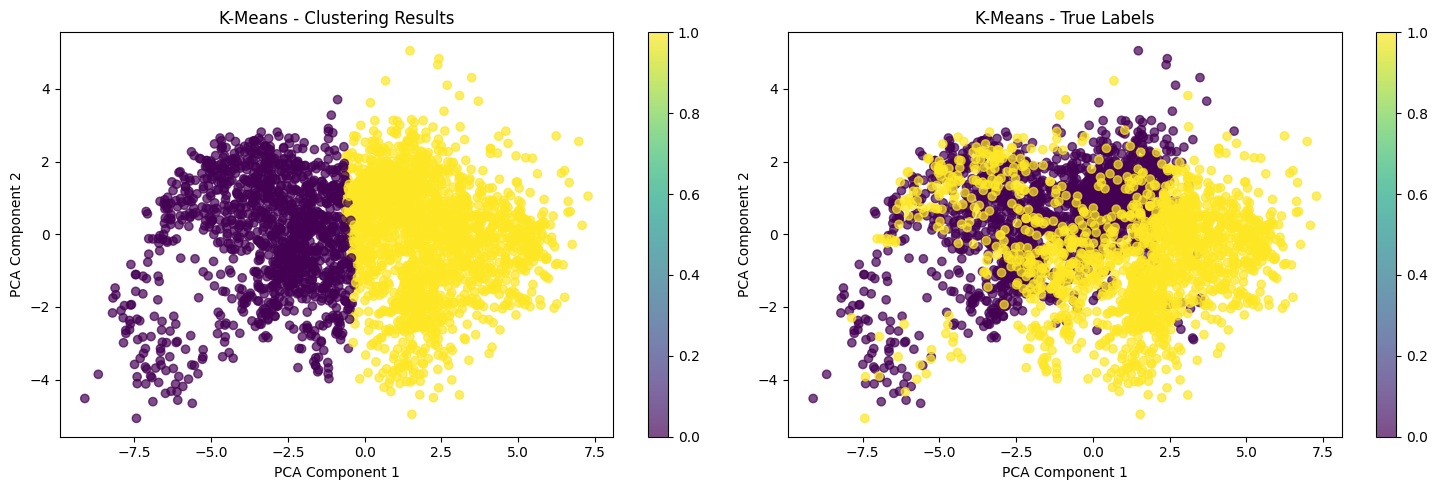

PCA Explained Variance: [0.45216391 0.11870609]

FEATURE IMPORTANCE ANALYSIS

Top 10 Most Important Features for Clustering:
     feature  importance
0   meanfreq    0.770215
11  centroid    0.770215
9        sfm    0.760515
3        Q25    0.718303
1         sd    0.709781
2     median    0.683369
10      mode    0.641603
17    maxdom    0.600365
18   dfrange    0.597155
15   meandom    0.582557


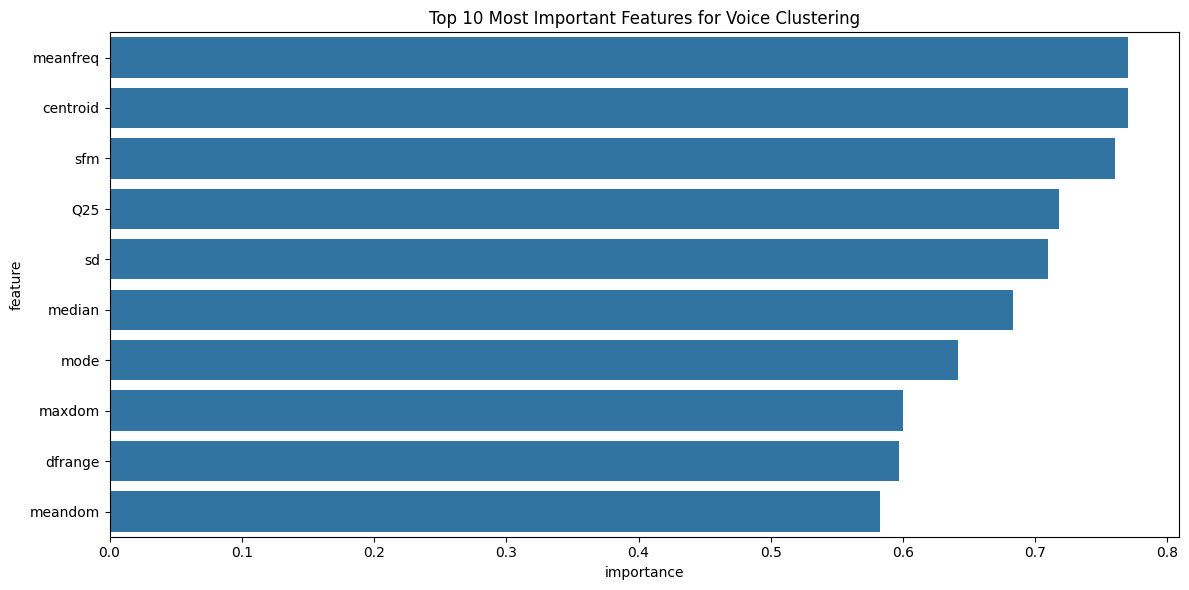


FINDING OPTIMAL NUMBER OF CLUSTERS


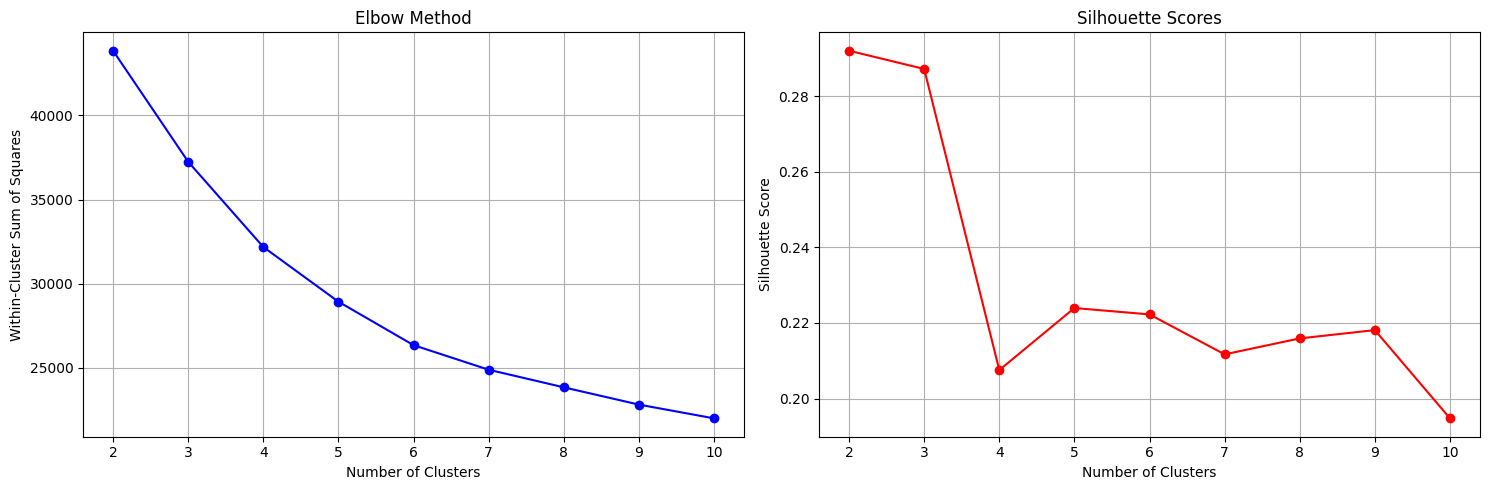

Optimal number of clusters (based on silhouette): 2

FINAL SUMMARY
Dataset: C:\Users\Lucifer\Downloads\1.xlsx
Dataset size: 3168 samples
Number of features: 20
Best clustering method: K-Means
Best silhouette score: 0.2920
True label distribution: {'male': np.int64(1584), 'female': np.int64(1584)}
Approximate accuracy: 0.6394

🎉 Clustering analysis completed successfully!


In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# ==================== DATASET LOADING ====================
print("Loading dataset...")

# Use your specific file path
file_path = r'C:\Users\Lucifer\Downloads\1.xlsx'

try:
    df = pd.read_excel(file_path)
    print("✓ Dataset loaded successfully!")
    print(f"File: {file_path}")
    print(f"Dataset shape: {df.shape}")
    
except Exception as e:
    print(f"✗ Error loading file: {e}")
    print("Please check:")
    print("1. The file exists at the specified path")
    print("2. The file is not open in Excel")
    print("3. You have permission to read the file")
    exit()

# ==================== DATA EXPLORATION ====================
print("\n" + "="*50)
print("DATA EXPLORATION")
print("="*50)

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nFirst 5 rows:")
print(df.head())

print(f"\nData types:")
print(df.dtypes)

print(f"\nMissing values:")
print(df.isnull().sum())

# Check if 'label' column exists
if 'label' not in df.columns:
    print("\n⚠️  'label' column not found. Available columns:")
    print(df.columns.tolist())
    # If no label column, we'll do pure unsupervised clustering
    has_labels = False
else:
    has_labels = True
    print(f"\nLabel distribution:")
    print(df['label'].value_counts())

# ==================== DATA PREPARATION ====================
print("\n" + "="*50)
print("DATA PREPARATION")
print("="*50)

if has_labels:
    # Separate features and labels
    X = df.drop('label', axis=1)
    true_labels = df['label']
    
    # Convert labels to numerical for evaluation
    label_map = {'male': 0, 'female': 1}
    y_true = true_labels.map(label_map)
else:
    # Use all data for clustering (no labels)
    X = df.copy()
    y_true = None
    print("No labels found - performing pure unsupervised clustering")

# Handle any missing values
if X.isnull().sum().sum() > 0:
    print(f"Filling {X.isnull().sum().sum()} missing values...")
    X = X.fillna(X.mean())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Final data shape: {X_scaled.shape}")

# ==================== CLUSTERING ALGORITHMS ====================
def kmeans_clustering(X, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X)
    return kmeans_labels, kmeans

def hierarchical_clustering(X, n_clusters=2):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical_labels = hierarchical.fit_predict(X)
    return hierarchical_labels, hierarchical

def gmm_clustering(X, n_components=2):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm_labels = gmm.fit_predict(X)
    return gmm_labels, gmm

def dbscan_clustering(X, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(X)
    return dbscan_labels, dbscan

def evaluate_clustering(true_labels, pred_labels, algorithm_name):
    sil_score = silhouette_score(X_scaled, pred_labels)
    
    if true_labels is not None:
        ari = adjusted_rand_score(true_labels, pred_labels)
    else:
        ari = None
        
    unique, counts = np.unique(pred_labels, return_counts=True)
    cluster_dist = dict(zip(unique, counts))
    
    print(f"\n{algorithm_name} Results:")
    print(f"  Silhouette Score: {sil_score:.4f}")
    if ari is not None:
        print(f"  Adjusted Rand Index: {ari:.4f}")
    print(f"  Cluster distribution: {cluster_dist}")
    
    return sil_score, ari

# ==================== RUN CLUSTERING ====================
print("\n" + "="*50)
print("RUNNING CLUSTERING ALGORITHMS")
print("="*50)

# Run all clustering methods
results = {}

# K-Means
kmeans_labels, kmeans_model = kmeans_clustering(X_scaled)
kmeans_sil, kmeans_ari = evaluate_clustering(y_true, kmeans_labels, "K-Means")
results['K-Means'] = (kmeans_sil, kmeans_ari, kmeans_labels)

# Hierarchical Clustering
hierarchical_labels, hierarchical_model = hierarchical_clustering(X_scaled)
hierarchical_sil, hierarchical_ari = evaluate_clustering(y_true, hierarchical_labels, "Hierarchical")
results['Hierarchical'] = (hierarchical_sil, hierarchical_ari, hierarchical_labels)

# GMM
gmm_labels, gmm_model = gmm_clustering(X_scaled)
gmm_sil, gmm_ari = evaluate_clustering(y_true, gmm_labels, "Gaussian Mixture Model")
results['GMM'] = (gmm_sil, gmm_ari, gmm_labels)

# DBSCAN
dbscan_labels, dbscan_model = dbscan_clustering(X_scaled, eps=1.5, min_samples=5)
dbscan_sil, dbscan_ari = evaluate_clustering(y_true, dbscan_labels, "DBSCAN")
results['DBSCAN'] = (dbscan_sil, dbscan_ari, dbscan_labels)

# ==================== RESULTS COMPARISON ====================
print("\n" + "="*50)
print("COMPARISON OF ALL METHODS")
print("="*50)

best_method = None
best_score = -1

for method, (sil, ari, labels) in results.items():
    print(f"{method:20} | Silhouette: {sil:.4f}", end="")
    if ari is not None:
        print(f" | ARI: {ari:.4f}")
    else:
        print(" | ARI: N/A")
    
    if sil > best_score:
        best_score = sil
        best_method = method

print(f"\n🎯 BEST METHOD: {best_method} (Silhouette: {best_score:.4f})")

# ==================== VISUALIZATION ====================
print("\n" + "="*50)
print("VISUALIZATION")
print("="*50)

def visualize_clusters(X, labels, title, true_labels=None):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Clustering results
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter)
    plt.title(f'{title} - Clustering Results')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    
    # Plot 2: True labels (if available)
    if true_labels is not None:
        plt.subplot(1, 2, 2)
        scatter_true = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=true_labels, cmap='viridis', alpha=0.7)
        plt.colorbar(scatter_true)
        plt.title(f'{title} - True Labels')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
    
    plt.tight_layout()
    plt.show()
    
    print(f"PCA Explained Variance: {pca.explained_variance_ratio_}")

# Visualize best method
best_labels = results[best_method][2]
print(f"\nVisualizing results for: {best_method}")
visualize_clusters(X_scaled, best_labels, best_method, y_true)

# ==================== FEATURE ANALYSIS ====================
print("\n" + "="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)

if best_method == 'K-Means':
    # Analyze feature importance for K-means
    centers = kmeans_model.cluster_centers_
    feature_importance = np.std(centers, axis=0)
    
    importance_df = pd.DataFrame({
        'feature': df.drop('label', axis=1).columns if has_labels else df.columns,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 Most Important Features for Clustering:")
    print(importance_df.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(data=importance_df.head(10), x='importance', y='feature')
    plt.title('Top 10 Most Important Features for Voice Clustering')
    plt.tight_layout()
    plt.show()

# ==================== FIND OPTIMAL CLUSTERS ====================
print("\n" + "="*50)
print("FINDING OPTIMAL NUMBER OF CLUSTERS")
print("="*50)

def find_optimal_clusters(X, max_k=10):
    sil_scores = []
    wcss = []  # Within-cluster sum of squares
    
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
        sil_scores.append(silhouette_score(X, kmeans.labels_))
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Elbow method
    ax1.plot(range(2, max_k + 1), wcss, 'bo-')
    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('Within-Cluster Sum of Squares')
    ax1.set_title('Elbow Method')
    ax1.grid(True)
    
    # Silhouette scores
    ax2.plot(range(2, max_k + 1), sil_scores, 'ro-')
    ax2.set_xlabel('Number of Clusters')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Scores')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    optimal_k = np.argmax(sil_scores) + 2  # +2 because we start from k=2
    print(f"Optimal number of clusters (based on silhouette): {optimal_k}")
    
    return wcss, sil_scores

wcss, sil_scores = find_optimal_clusters(X_scaled)

# ==================== FINAL SUMMARY ====================
print("\n" + "="*60)
print("FINAL SUMMARY")
print("="*60)
print(f"Dataset: {file_path}")
print(f"Dataset size: {len(df)} samples")
print(f"Number of features: {X.shape[1]}")
print(f"Best clustering method: {best_method}")
print(f"Best silhouette score: {best_score:.4f}")

if has_labels:
    print(f"True label distribution: {dict(df['label'].value_counts())}")
    
    # Calculate approximate accuracy
    if best_method != 'DBSCAN':  # DBSCAN might have noise points
        cluster_0_majority = np.sum((best_labels == 0) & (y_true == 0)) / np.sum(best_labels == 0)
        cluster_1_majority = np.sum((best_labels == 1) & (y_true == 1)) / np.sum(best_labels == 1)
        approx_accuracy = (cluster_0_majority + cluster_1_majority) / 2
        print(f"Approximate accuracy: {approx_accuracy:.4f}")

print("\n🎉 Clustering analysis completed successfully!")